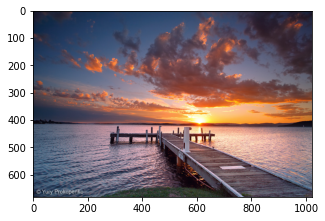

In [2]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
%matplotlib inline

pic = iio.imread('./images/sunset.jpg')
plt.figure(figsize = (5,5))
plt.imshow(pic)

In [4]:
print('Type of the image : ' , type(pic))
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'numpy.ndarray'>
(682, 1023, 3)
Shape of the image : (682, 1023, 3)
Image Hight 682
Image Width 1023
Dimension of Image 3
